In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- PoolArea: Pool area in square feet
- GarageArea: Size of garage in square feet
- Fireplaces: Number of fireplaces
- Kitchen: Number of kitchens
- Bedroom: Number of bedrooms above basement level
- GrLivArea: Above grade (ground) living area square feet
- YearBuilt: Original construction date
- Condition1: Proximity to main road or railroad
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- LotArea: Lot size in square feet
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

In [4]:
train_f = train.filter(['SalePrice', 'LotArea', 'OverallQual', 'Condition1', 'Condition2', 'YearBuilt', 'GrLivArea', 'Bedroom', 'Kitchen', 'Fireplaces', 'GarageArea', 'PoolArea'], axis=1)

<AxesSubplot: >

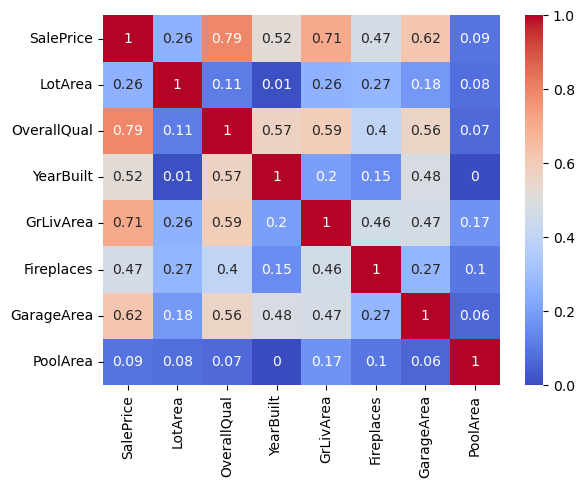

In [5]:
# Calcular la matriz de correlación entre las variables numéricas
corr_matrix = train_f.corr(numeric_only = True).round(2)

# Graficar la matriz de correlación con Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

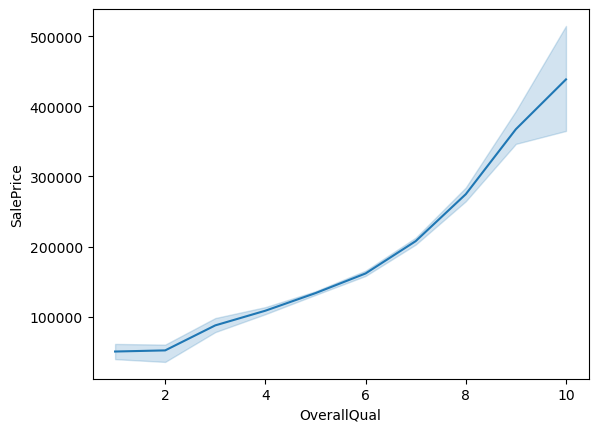

In [6]:
sns.lineplot(x = train_f.OverallQual, y = train_f.SalePrice)

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

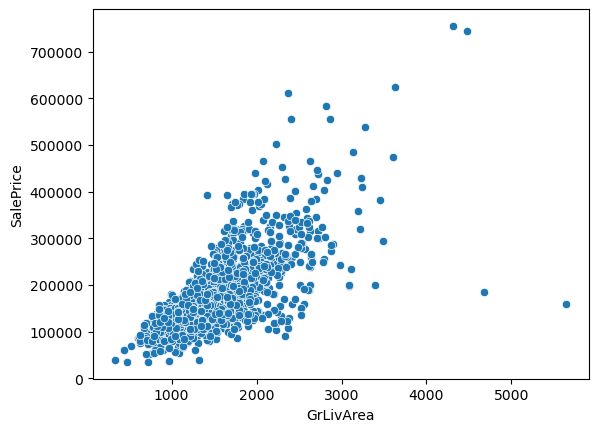

In [7]:
sns.scatterplot(x = train_f.GrLivArea, y = train_f.SalePrice)

<AxesSubplot: xlabel='GarageArea', ylabel='SalePrice'>

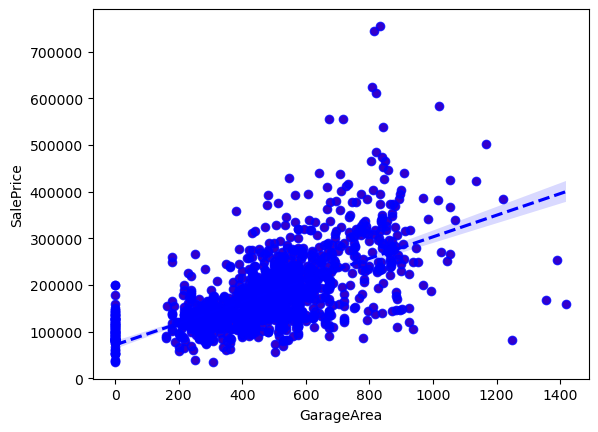

In [8]:
sns.scatterplot(x = train_f.GarageArea, y = train_f.SalePrice, color="red")
sns.regplot(x = train_f.GarageArea, y = train_f.SalePrice, color="blue", line_kws={'linestyle':'--'})

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

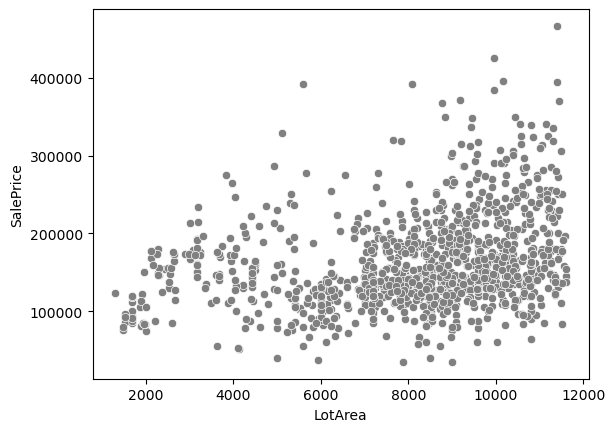

In [9]:
q3 = np.quantile(train_f.LotArea, 0.75)
train_f = train_f[train_f.LotArea <= q3]

sns.scatterplot(x = train_f.LotArea, y = train_f.SalePrice, color="gray")

In [10]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SalePrice    1095 non-null   int64 
 1   LotArea      1095 non-null   int64 
 2   OverallQual  1095 non-null   int64 
 3   Condition1   1095 non-null   object
 4   Condition2   1095 non-null   object
 5   YearBuilt    1095 non-null   int64 
 6   GrLivArea    1095 non-null   int64 
 7   Fireplaces   1095 non-null   int64 
 8   GarageArea   1095 non-null   int64 
 9   PoolArea     1095 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 94.1+ KB


In [11]:
train_f.head()

,SalePrice,LotArea,OverallQual,Condition1,Condition2,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea
0,208500,8450,7,Norm,Norm,2003,1710,0,548,0
1,181500,9600,6,Feedr,Norm,1976,1262,1,460,0
2,223500,11250,7,Norm,Norm,2001,1786,1,608,0
3,140000,9550,7,Norm,Norm,1915,1717,1,642,0
6,307000,10084,8,Norm,Norm,2004,1694,1,636,0


In [12]:
cond = pd.DataFrame()
cond['Cond1'] = train_f.Condition1.value_counts()
cond['Cond2'] = train_f.Condition2.value_counts()

cond

,Cond1,Cond2
Norm,954,1084.0
Feedr,64,6.0
Artery,38,2.0
RRAn,17,1.0
PosN,11,NaN
RRNn,4,2.0
RRAe,4,NaN
RRNe,2,NaN
PosA,1,NaN


Si cond1 != cond2 significa que hay >= 2 accesos principales a la casa -> 0, si hay un solo acceso = 1

In [13]:
train_f['Condition'] = np.where(train_f['Condition1'] != train_f['Condition2'], 0, 1)
train_f.drop(['Condition1', 'Condition2'], axis = 1, inplace = True)

In [14]:
train_f

,SalePrice,LotArea,OverallQual,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,Condition
0,208500,8450,7,2003,1710,0,548,0,1
1,181500,9600,6,1976,1262,1,460,0,0
2,223500,11250,7,2001,1786,1,608,0,1
3,140000,9550,7,1915,1717,1,642,0,1
6,307000,10084,8,2004,1694,1,636,0,1
...,...,...,...,...,...,...,...,...,...
1454,185000,7500,7,2004,1221,0,400,0,1
1455,175000,7917,6,1999,1647,1,460,0,1
1457,266500,9042,7,1941,2340,2,252,0,1
1458,142125,9717,5,1950,1078,0,240,0,1


In [15]:
train_f.describe().round(2)

,SalePrice,LotArea,OverallQual,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,Condition
count,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00,1095.00
mean,162644.38,8084.86,5.91,1969.33,1403.39,0.50,436.87,1.12,0.87
std,59636.48,2435.60,1.28,30.78,434.52,0.59,202.48,26.19,0.33
min,34900.00,1300.00,1.00,1872.00,334.00,0.00,0.00,0.00,0.00
25%,124250.00,6986.00,5.00,1950.00,1072.00,0.00,296.50,0.00,1.00
50%,149350.00,8635.00,6.00,1971.00,1355.00,0.00,445.00,0.00,1.00
75%,190000.00,9900.00,7.00,2000.00,1664.50,1.00,550.00,0.00,1.00
max,466500.00,11600.00,10.00,2010.00,3395.00,3.00,1053.00,648.00,1.00


In [16]:
def hist(columna, bins):
    return sns.histplot(train_f[str(columna)], bins = bins)

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

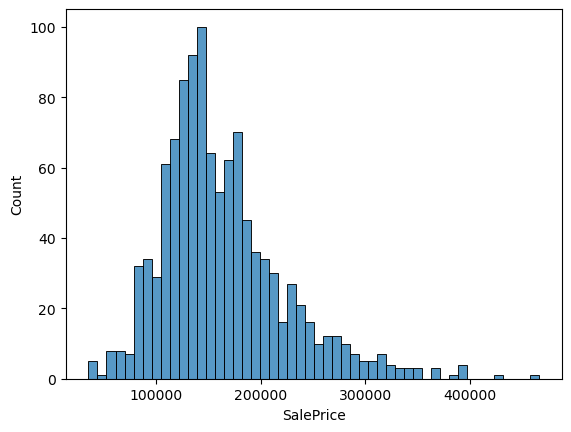

In [17]:
hist('SalePrice', 50)

<AxesSubplot: xlabel='LotArea', ylabel='Count'>

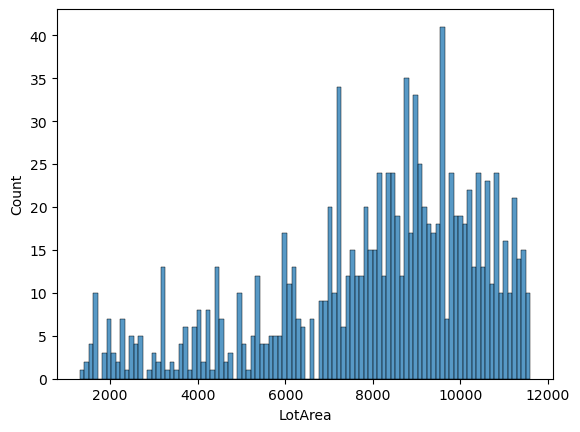

In [18]:
hist('LotArea', bins = 100)

<AxesSubplot: xlabel='YearBuilt', ylabel='Count'>

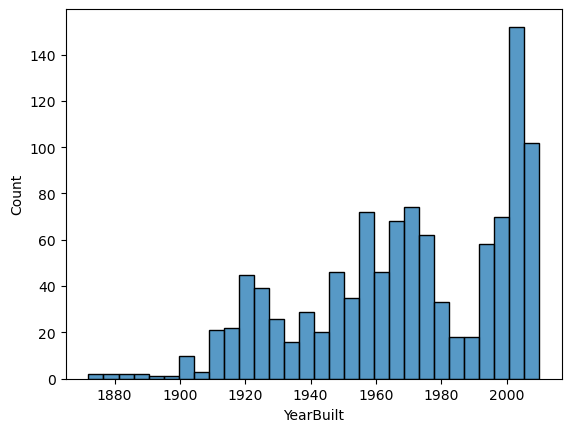

In [19]:
hist('YearBuilt', bins=30)

<AxesSubplot: xlabel='GrLivArea', ylabel='Count'>

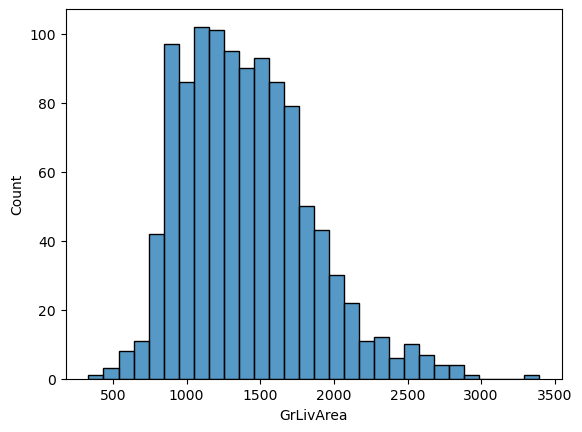

In [20]:
hist('GrLivArea', bins=30)

<AxesSubplot: xlabel='GarageArea', ylabel='Count'>

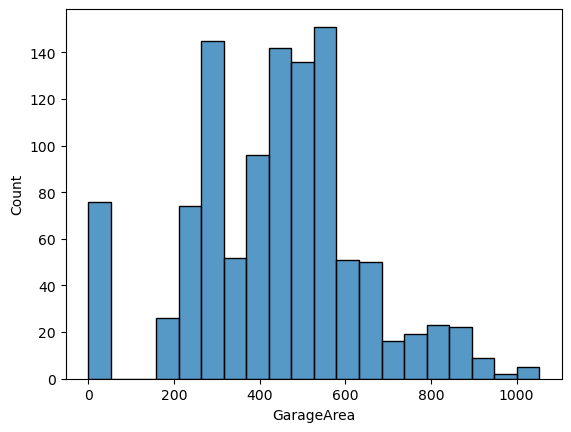

In [21]:
hist('GarageArea', bins=20)

<AxesSubplot: xlabel='PoolArea', ylabel='Density'>

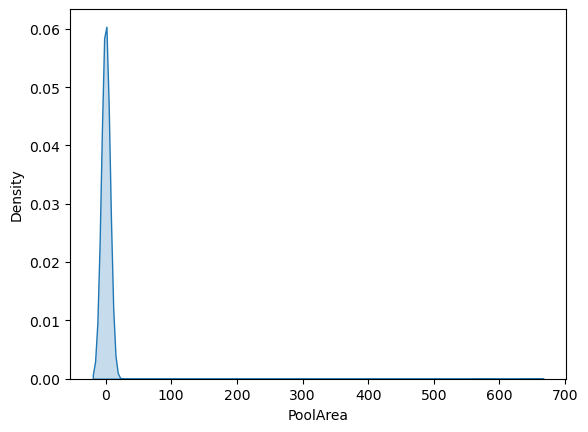

In [22]:
sns.kdeplot(data=train_f, x="PoolArea", fill = True)

Elimino PoolArea porque solo hay 7 observaciones != 0, es decir solo aparecen siete casas con pileta de x feetArea

In [23]:
train_f.PoolArea.value_counts()

0      1093
648       1
576       1
Name: PoolArea, dtype: int64

In [24]:
train_f.Fireplaces.value_counts()

0    605
1    437
2     52
3      1
Name: Fireplaces, dtype: int64

<AxesSubplot: >

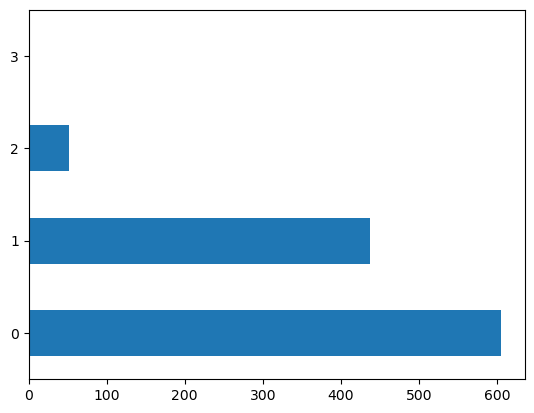

In [25]:
train_f.Fireplaces.value_counts().plot(kind='barh')

La mayoria de las casas solo tienen un acceso principal

<AxesSubplot: >

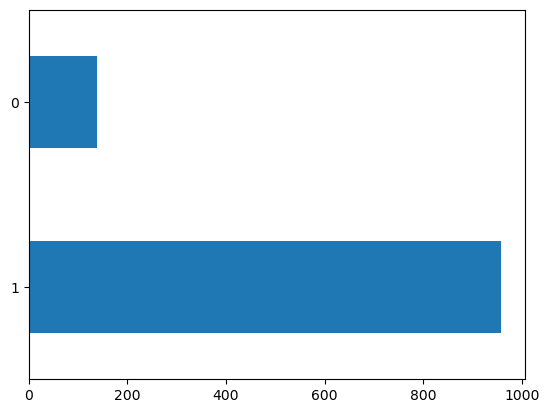

In [26]:
train_f.Condition.value_counts().plot(kind='barh')

In [27]:
train_f.drop(['PoolArea'], axis = 1, inplace = True)

<AxesSubplot: >

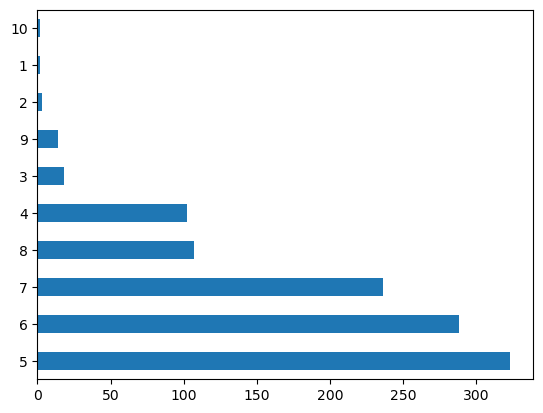

In [28]:
train_f.OverallQual.value_counts().plot(kind='barh')

<AxesSubplot: xlabel='OverallQual', ylabel='Count'>

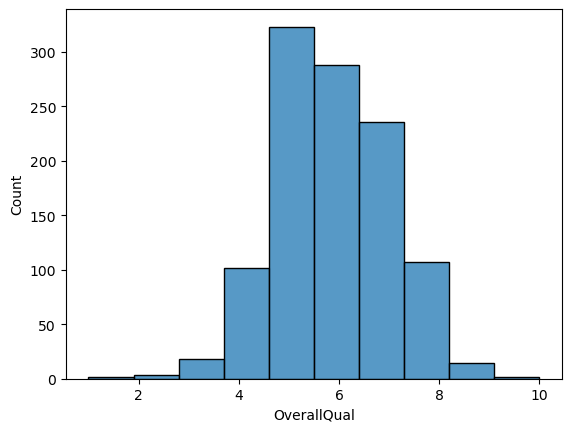

In [29]:
hist('OverallQual', bins=10)

In [30]:
#train_f.to_csv('Train_exp.csv')

In [31]:
train_f.columns

Index(['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea',
       'Fireplaces', 'GarageArea', 'Condition'],
      dtype='object')

In [41]:
df = pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
df = df.filter(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea',
       'Fireplaces', 'GarageArea', 'Condition1', 'Condition2'], axis = 1)
df

,Id,LotArea,OverallQual,YearBuilt,GrLivArea,Fireplaces,GarageArea,Condition1,Condition2
0,1461,11622,5,1961,896,0,730.0,Feedr,Norm
1,1462,14267,6,1958,1329,0,312.0,Norm,Norm
2,1463,13830,5,1997,1629,1,482.0,Norm,Norm
3,1464,9978,6,1998,1604,1,470.0,Norm,Norm
4,1465,5005,8,1992,1280,0,506.0,Norm,Norm
...,...,...,...,...,...,...,...,...,...
1454,2915,1936,4,1970,1092,0,0.0,Norm,Norm
1455,2916,1894,4,1970,1092,0,286.0,Norm,Norm
1456,2917,20000,5,1960,1224,1,576.0,Norm,Norm
1457,2918,10441,5,1992,970,0,0.0,Norm,Norm


In [43]:
df['Condition'] = np.where(df['Condition1'] != df['Condition2'], 0, 1)
df.drop(['Condition1', 'Condition2'], axis = 1, inplace = True)

In [45]:
df.fillna(df.GarageArea.mean(), inplace=True)

df.to_csv('test_exp.csv')